# Import Dataset

In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\vaish\Downloads\blinkit.csv")



# converting the date column into date and time

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   OrderID              7000 non-null   object        
 1   Date                 7000 non-null   datetime64[ns]
 2   CustomerID           7000 non-null   object        
 3   ProductName          7000 non-null   object        
 4   Category             7000 non-null   object        
 5   Quantity             7000 non-null   int64         
 6   UnitPrice            7000 non-null   float64       
 7   City                 7000 non-null   object        
 8   PaymentMethod        7000 non-null   object        
 9   DeliveryTimeMinutes  7000 non-null   int64         
 10  Revenue              7000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 601.7+ KB


In [5]:
df.head()

,OrderID,Date,CustomerID,ProductName,Category,Quantity,UnitPrice,City,PaymentMethod,DeliveryTimeMinutes,Revenue
0,B00001,2024-10-21,C1106,Cheese,Dairy,2,158.73,Pune,COD,52,317.46
1,B00002,2024-10-09,C0899,Chips,Snacks,4,213.44,Mumbai,UPI,12,853.76
2,B00003,2024-03-21,C1129,Curd,Dairy,1,24.90,Pune,UPI,36,24.90
3,B00004,2024-11-02,C1213,Mango,Fruits,4,253.70,Delhi,Netbanking,14,1014.80
4,B00005,2024-05-13,C0993,Cheese,Dairy,3,253.62,Noida,Card,31,760.86


# Create Time Based Features

In [6]:
df['Month'] = df['Date'].dt.month_name()
df['Month_Num'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['DayOfWeek'] = df['Date'].dt.day_name()


In [7]:
df[['Date', 'Month', 'Week', 'DayOfWeek']].sample(5)


,Date,Month,Week,DayOfWeek
6002,2024-09-17,September,38,Tuesday
147,2024-03-10,March,10,Sunday
4986,2024-08-04,August,31,Sunday
2076,2024-04-17,April,16,Wednesday
3087,2024-08-18,August,33,Sunday


# Add Revenue Column

In [8]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']


In [9]:
df[['ProductName', 'Quantity', 'UnitPrice', 'Revenue']].sample(5)


,ProductName,Quantity,UnitPrice,Revenue
5784,Popcorn,4,147.26,589.04
3336,Cheese,4,78.67,314.68
5575,Namkeen,3,168.67,506.01
4945,Cheese,4,112.72,450.88
6590,Milk,5,43.96,219.80


# Customer Purchase Frequency

In [10]:
purchase_freq = df.groupby('CustomerID')['OrderID'].nunique().reset_index()
purchase_freq.columns = ['CustomerID', 'PurchaseCount']


In [11]:
purchase_freq.sort_values(by='PurchaseCount', ascending=False).head()


,CustomerID,PurchaseCount
1475,C1492,12
1245,C1260,12
11,C0012,12
536,C0543,11
21,C0022,11


# Revenue by Month (Spikes & Dips)


In [12]:
monthly_revenue = df.groupby(['Month_Num', 'Month'])['Revenue'].sum().reset_index()
monthly_revenue = monthly_revenue.sort_values('Month_Num')


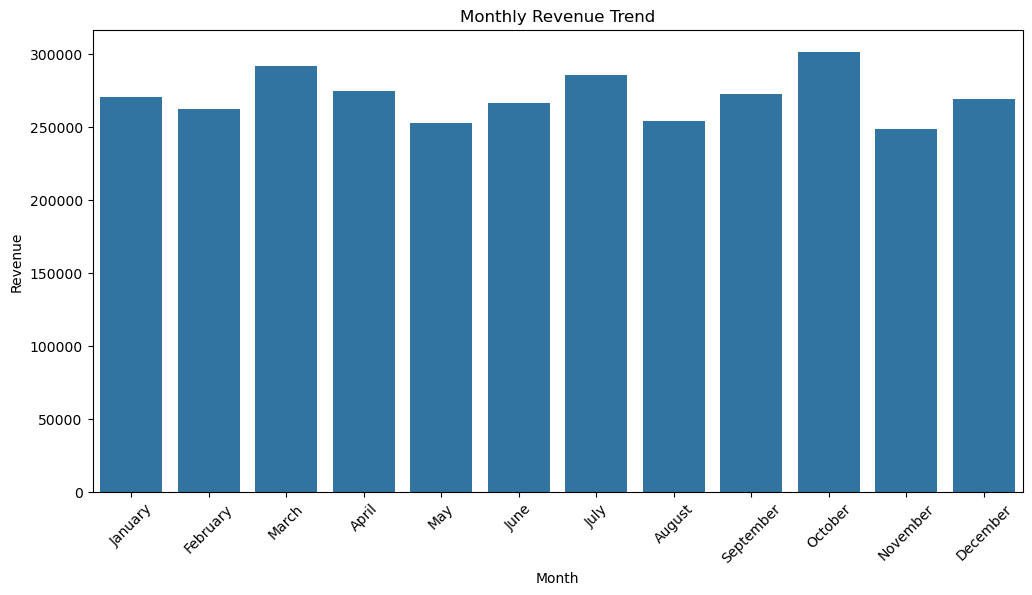

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_revenue, x='Month', y='Revenue')
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.show()


# Best-Selling Categories

In [14]:
category_sales = df.groupby('Category')['Quantity'].sum().reset_index()
category_sales = category_sales.sort_values(by='Quantity', ascending=False)


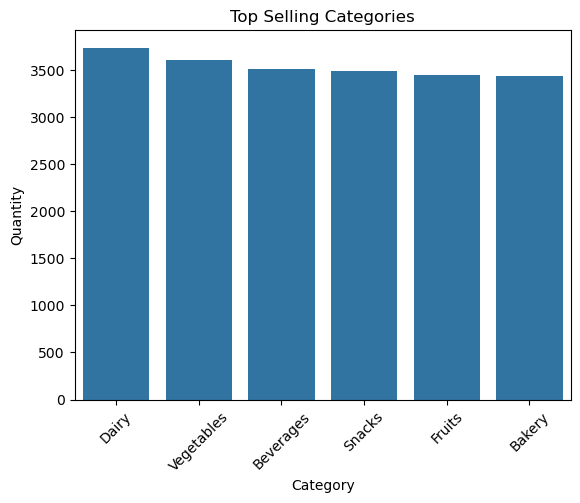

In [15]:
sns.barplot(data=category_sales, x='Category', y='Quantity')
plt.title("Top Selling Categories")
plt.xticks(rotation=45)
plt.show()


# Weekly Revenue (Spikes/Dips)

In [16]:
weekly_revenue = df.groupby('Week')['Revenue'].sum().reset_index()


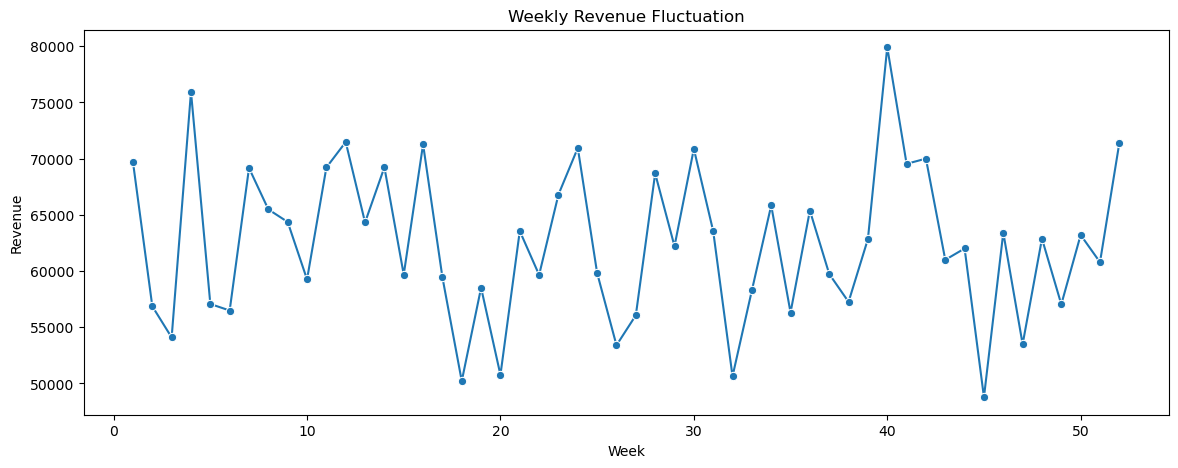

In [17]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=weekly_revenue, x='Week', y='Revenue', marker='o')
plt.title("Weekly Revenue Fluctuation")
plt.show()


In [18]:
df.to_csv("blinkit_cleaned.csv", index=False)
